In [1]:
#Gerekli kütüphaneleri yükleyelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data=pd.read_csv('ukTrafficAADF.csv')   
data1 = pd.read_csv("accidents_2005_to_2007.csv")   #verilerimizi yükleyelim
data2 = pd.read_csv("accidents_2009_to_2011.csv")
data3 = pd.read_csv("accidents_2012_to_2014.csv")
data_accidents = pd.concat([data1,data2,data3])    #verilerimizi birleştirelim
data_accidents

C:\Users\muham\AppData\Local\Temp\ipykernel_4072\3546515593.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("accidents_2005_to_2007.csv")   #verilerimizi yükleyelim
C:\Users\muham\AppData\Local\Temp\ipykernel_4072\3546515593.py:4: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv("accidents_2012_to_2014.csv")


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [3]:
data_accidents.info()  #verilerimizin bilgielrine bakalım

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [4]:
data_accidents.shape   #verilemizin boyutuna bakalım 


(1504150, 33)

In [5]:
data.head()  #ilk 5 veri

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [6]:
data.tail()  #son 5 veri

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
275380,2016,99736,Estimated,Estimated using previous year's AADF on this link,East Midlands,Derbyshire,A625,PR,426800,379200,...,70,18,141,5,9,26,268,5358,53.309068,-1.599252
275381,2016,99756,Estimated,Estimated using previous year's AADF on this link,East Midlands,Derbyshire,A50,TR,442752,330100,...,1236,285,342,339,2092,2161,6454,63447,52.866690,-1.366373
275382,2016,99941,Estimated,Estimated using previous year's AADF on this link,East Midlands,Northamptonshire,A4500,PR,484000,264310,...,80,22,4,3,9,5,124,9281,52.270539,-0.770410
275383,2016,99942,Counted,Manual count,East Midlands,Rutland,A6003,PR,486340,296000,...,114,10,41,31,80,59,335,6602,52.555003,-0.727959
275384,2016,99967,Estimated,Estimated using previous year's AADF on this link,East Midlands,Leicester,A563,PU,461390,307690,...,730,142,175,66,277,253,1643,21470,52.663461,-1.093733


In [7]:
#eksik veri var mı diye bakalım 
data_accidents.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [8]:
data_accidents.Time

0         17:42
1         17:36
2         00:15
3         10:35
4         21:13
          ...  
464692    22:20
464693    06:40
464694    02:00
464695    06:55
464696    15:00
Name: Time, Length: 1504150, dtype: object

In [9]:
#sütünları kadlıralım veri etmizliği için 
yeniData = data_accidents.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location','Light_Conditions','Weather_Conditions','Time','Road_Surface_Conditions'], axis=1)
yeniData

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Urban_or_Rural_Area,Year
0,2,1,1,3,Single carriageway,30,1,2005
1,3,1,1,4,Dual carriageway,30,1,2005
2,3,2,1,5,Single carriageway,30,1,2005
3,3,1,1,6,Single carriageway,30,1,2005
4,3,1,1,2,Single carriageway,30,1,2005
...,...,...,...,...,...,...,...,...
464692,2,2,1,1,Dual carriageway,70,2,2014
464693,3,2,2,5,Dual carriageway,70,2,2014
464694,3,1,1,3,Single carriageway,40,2,2014
464695,2,3,2,4,Single carriageway,60,2,2014


In [10]:
yeniData.isnull().sum()

Accident_Severity       0
Number_of_Vehicles      0
Number_of_Casualties    0
Day_of_Week             0
Road_Type               0
Speed_limit             0
Urban_or_Rural_Area     0
Year                    0
dtype: int64

In [11]:
yeniData_accidents=yeniData.dropna()   #eksik olan data satırlarmızı silindi ama gecici olarak

In [12]:
yeniData_accidents

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Urban_or_Rural_Area,Year
0,2,1,1,3,Single carriageway,30,1,2005
1,3,1,1,4,Dual carriageway,30,1,2005
2,3,2,1,5,Single carriageway,30,1,2005
3,3,1,1,6,Single carriageway,30,1,2005
4,3,1,1,2,Single carriageway,30,1,2005
...,...,...,...,...,...,...,...,...
464692,2,2,1,1,Dual carriageway,70,2,2014
464693,3,2,2,5,Dual carriageway,70,2,2014
464694,3,1,1,3,Single carriageway,40,2,2014
464695,2,3,2,4,Single carriageway,60,2,2014


In [13]:
yeniData_accidents.describe() #veri seti ile ilgili tanımlamalar  gelir satır sütün

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Year
count,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.900540e+01,1.353871e+00,2.009370e+03
std,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,1.413993e+01,4.783534e-01,3.013497e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,2.005000e+03
25%,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,1.000000e+00,2.006000e+03
50%,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.000000e+01,1.000000e+00,2.010000e+03
75%,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.000000e+01,2.000000e+00,2.012000e+03
max,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,7.000000e+01,3.000000e+00,2.014000e+03


<AxesSubplot: xlabel='Year'>

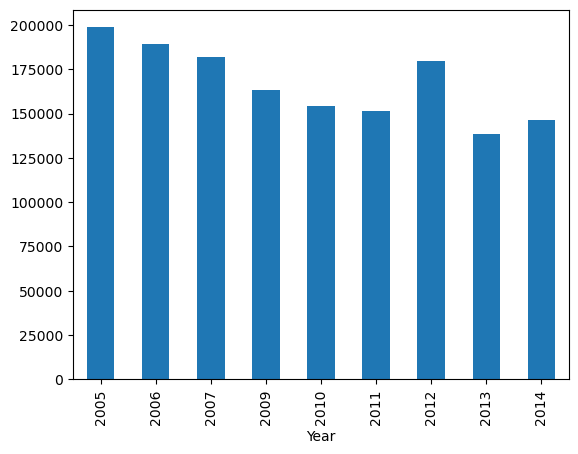

In [14]:
# verilerimizi görseleştirelim 

a=yeniData_accidents.groupby('Year').size()  # yıllra göre dağılımı 
a.plot.bar()

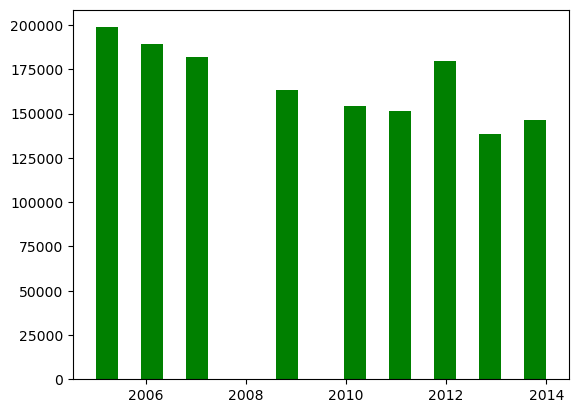

In [15]:
plt.hist(yeniData_accidents.Year,bins=20,color='g') #histogramını çizdirir yıllara göre kaza 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


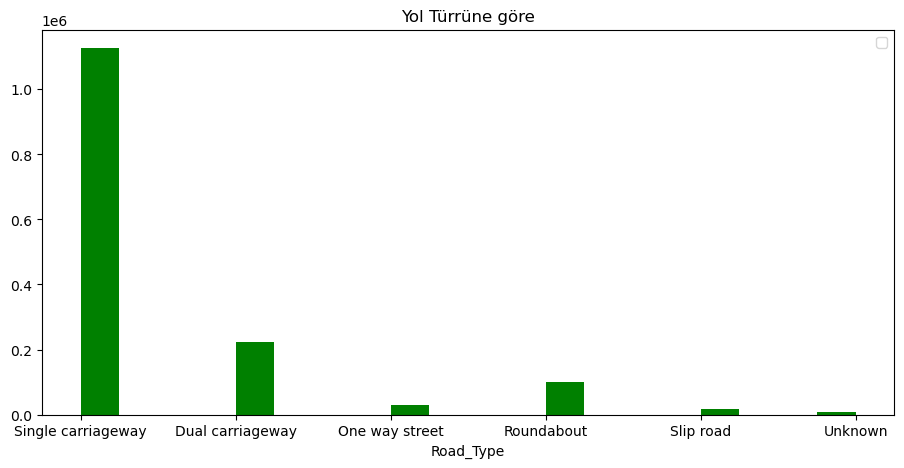

In [16]:
plt.figure(figsize=(11, 5))
plt.hist(yeniData_accidents.Road_Type,bins=20,color='g') 
plt.xlabel('Road_Type')
plt.title('Yol Türrüne göre')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


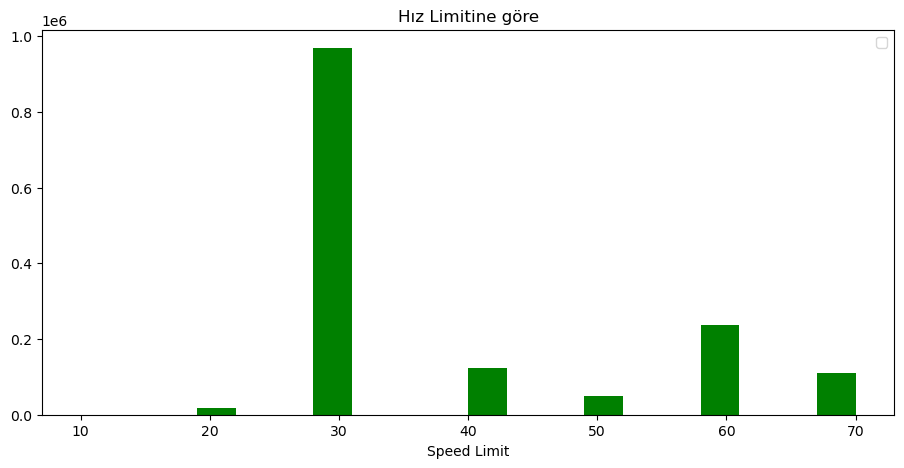

In [17]:
plt.figure(figsize=(11, 5))
plt.hist(yeniData_accidents.Speed_limit,bins=20,color='g') 
plt.xlabel('Speed Limit')
plt.title('Hız Limitine göre')
plt.legend()
plt.show()

In [18]:
yeniData_accidents

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Urban_or_Rural_Area,Year
0,2,1,1,3,Single carriageway,30,1,2005
1,3,1,1,4,Dual carriageway,30,1,2005
2,3,2,1,5,Single carriageway,30,1,2005
3,3,1,1,6,Single carriageway,30,1,2005
4,3,1,1,2,Single carriageway,30,1,2005
...,...,...,...,...,...,...,...,...
464692,2,2,1,1,Dual carriageway,70,2,2014
464693,3,2,2,5,Dual carriageway,70,2,2014
464694,3,1,1,3,Single carriageway,40,2,2014
464695,2,3,2,4,Single carriageway,60,2,2014


C:\Users\muham\AppData\Local\Temp\ipykernel_4072\1006574188.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=yeniData_accidents.corr()


<AxesSubplot: >

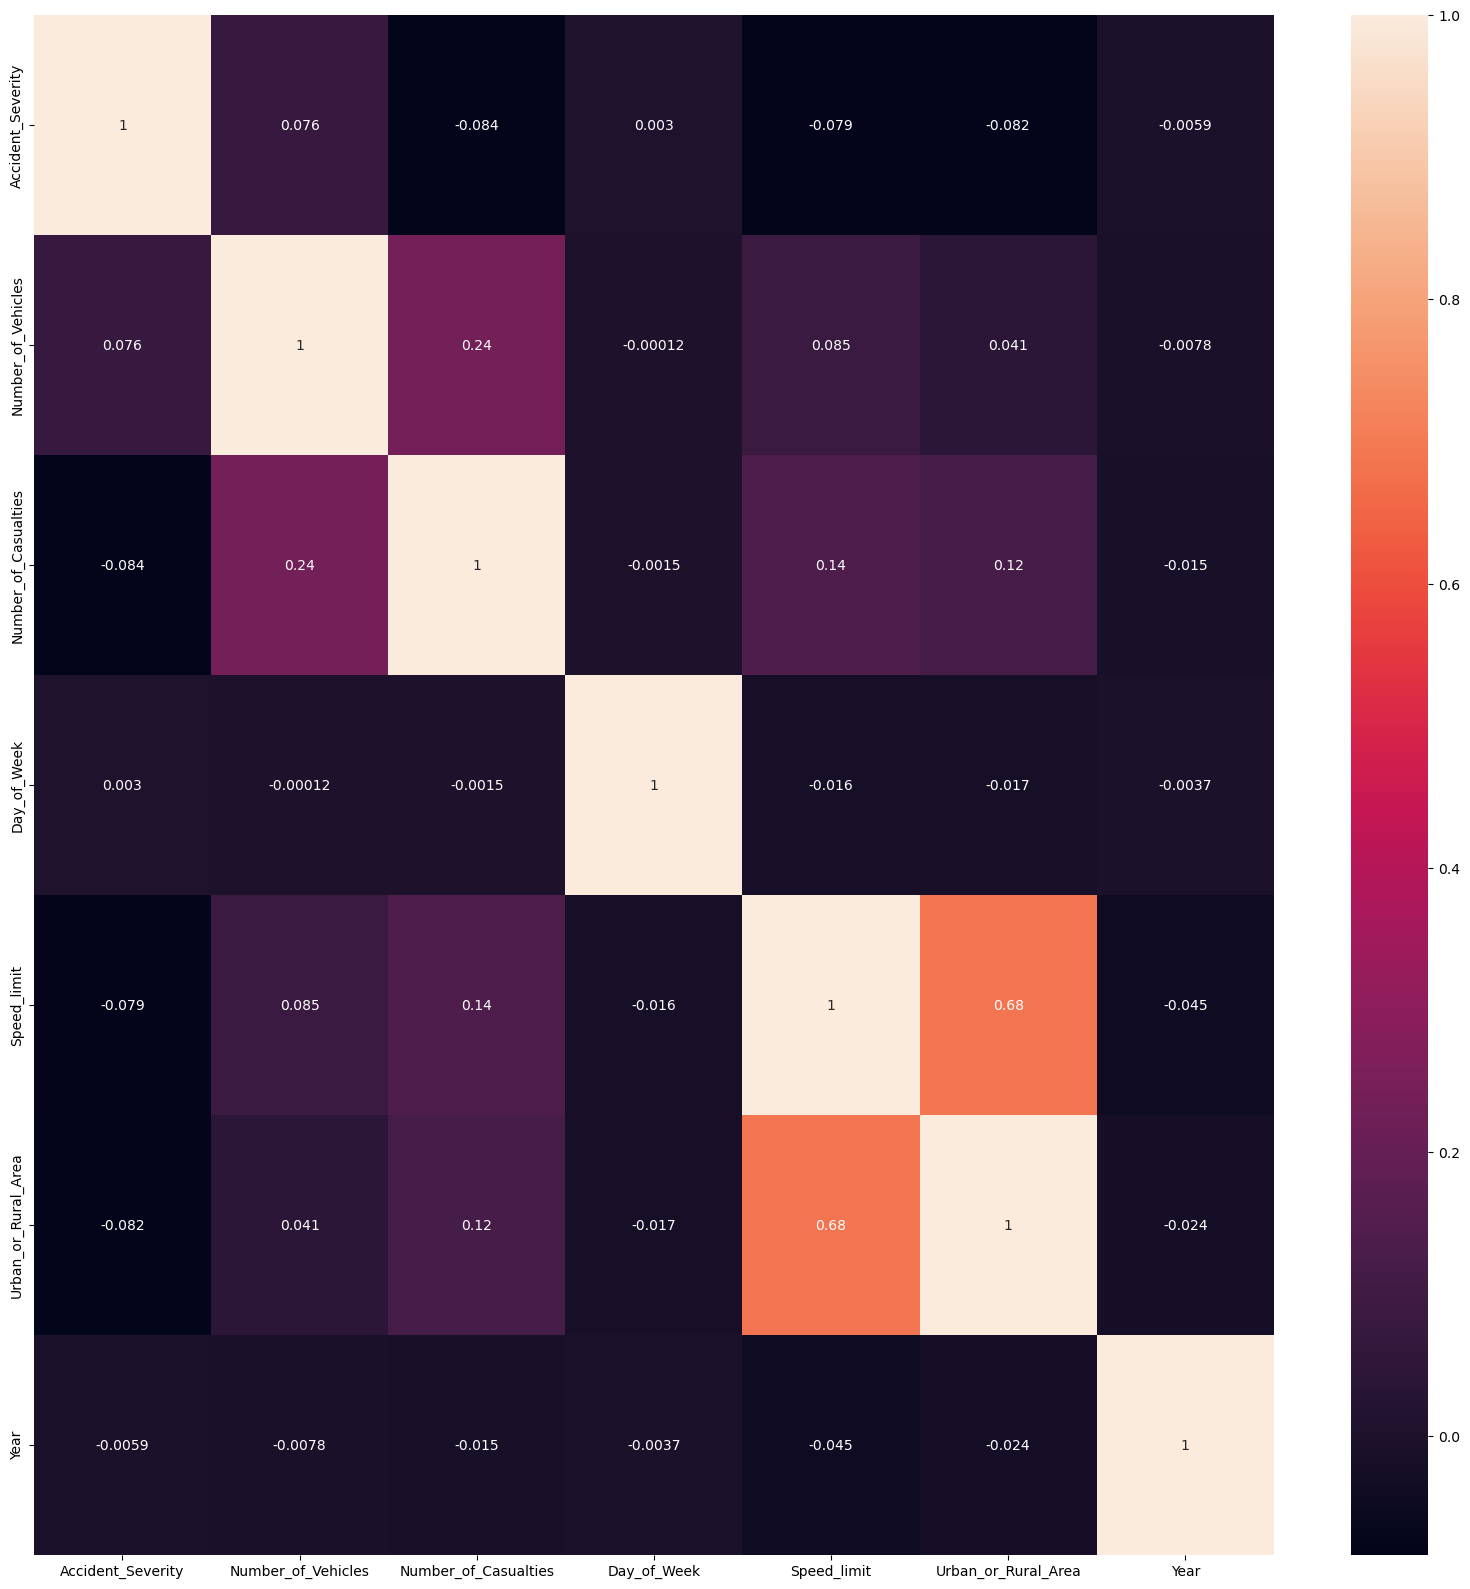

In [19]:
#korelasyon 
corr=yeniData_accidents.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [20]:
yeniData_accidents

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Urban_or_Rural_Area,Year
0,2,1,1,3,Single carriageway,30,1,2005
1,3,1,1,4,Dual carriageway,30,1,2005
2,3,2,1,5,Single carriageway,30,1,2005
3,3,1,1,6,Single carriageway,30,1,2005
4,3,1,1,2,Single carriageway,30,1,2005
...,...,...,...,...,...,...,...,...
464692,2,2,1,1,Dual carriageway,70,2,2014
464693,3,2,2,5,Dual carriageway,70,2,2014
464694,3,1,1,3,Single carriageway,40,2,2014
464695,2,3,2,4,Single carriageway,60,2,2014


In [21]:

#Trafik akışının değişmesi kazaları nasıl etkiler? sorusuna çözüm olaraktan 

#Ben burada Knn sınıflandırma algoritmasını kullanarak tek çift şerit üzerinde çalışacağım böylelikle çift şeridin ve tek şeridin
#trafik akışına etkisini göreceğiz 

#Kullancağımız modellere uygun olan datayı hazırlamaya çalışalım 


tek=yeniData_accidents[yeniData_accidents.Road_Type=='Single carriageway']
cift=yeniData_accidents[yeniData_accidents.Road_Type=='Dual carriageway']

#Burada tek çift şerit ayrımını yaptık şimdi ise görselleştirelim

In [22]:
#öznitelik çıkarımı için 
varyans= np.var(yeniData_accidents)
varyans


C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Accident_Severity         0.161477
Number_of_Vehicles        0.510880
Number_of_Casualties      0.681177
Day_of_Week               3.703332
Speed_limit             199.937437
Urban_or_Rural_Area       0.228822
Year                      9.081159
dtype: float64

In [23]:
standatSapma=np.std(yeniData_accidents)
standatSapma

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Accident_Severity        0.401842
Number_of_Vehicles       0.714758
Number_of_Casualties     0.825334
Day_of_Week              1.924404
Speed_limit             14.139924
Urban_or_Rural_Area      0.478353
Year                     3.013496
dtype: float64

In [24]:
#datamızı x ve y olarak ayırmamız gerekiyor train ve test için

yeniData_accidents.Road_Type=[1 if each=='Dual carriageway' else 0
                                 for each in yeniData_accidents.Road_Type]

In [25]:
y=yeniData_accidents.Road_Type.values #yani gerçek verilerim oluyor
X=yeniData_accidents.drop(['Road_Type','Year','Urban_or_Rural_Area'],axis=1)

In [26]:
X

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit
0,2,1,1,3,30
1,3,1,1,4,30
2,3,2,1,5,30
3,3,1,1,6,30
4,3,1,1,2,30
...,...,...,...,...,...
464692,2,2,1,1,70
464693,3,2,2,5,70
464694,3,1,1,3,40
464695,2,3,2,4,60


In [27]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
yeniData_accidents.Road_Type=le.fit_transform(yeniData_accidents.Road_Type)

In [29]:
#normalizasyon
x=(X-np.min(X))/(np.max(X)-np.min(X))
x

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit
0,0.5,0.000000,0.00000,0.333333,0.333333
1,1.0,0.000000,0.00000,0.500000,0.333333
2,1.0,0.015152,0.00000,0.666667,0.333333
3,1.0,0.000000,0.00000,0.833333,0.333333
4,1.0,0.000000,0.00000,0.166667,0.333333
...,...,...,...,...,...
464692,0.5,0.015152,0.00000,0.000000,1.000000
464693,1.0,0.015152,0.01087,0.666667,1.000000
464694,1.0,0.000000,0.00000,0.333333,0.500000
464695,0.5,0.030303,0.01087,0.500000,0.833333


In [34]:
## KNN 

In [30]:
#train test ve split 
from sklearn.model_selection import train_test_split #datamı train ve test olarak ayırmamı sağlıyor
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=3) #bu 3 bizim k parametre değerimizi


In [32]:
knn.fit(x_train,y_train) #sonra fit etmeliyizs

KNeighborsClassifier(n_neighbors=3)

In [33]:
prediction=knn.predict(x_test)   #verilerimizi tahmin edelim 

In [35]:
knn.score(x_test,y_test)  #score sonucunu çıkaralım test için ayırdığımız verinin 

0.8921284446365056

In [36]:
knn.score(x_train,y_train)

0.8939400990592693

In [38]:
a=0.8939400990592693-0.8921284446365056
a

0.0018116544227636533

In [39]:
#Trafik akışının değişmesi kazaları nasıl etkiler? cevabı yukarıda gerçek ver ve tahmin veri farkı ile kaza etkisi 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


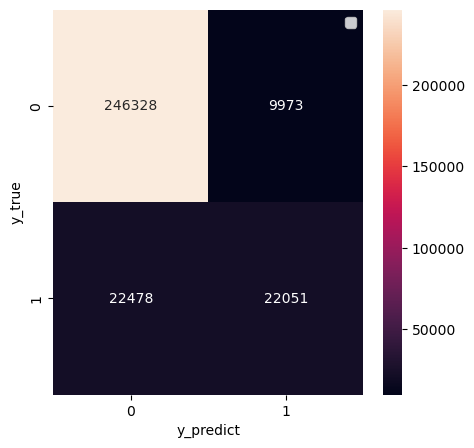

In [40]:
# hata matrixi confusion matrix  
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)  #buradaki prediction x_test predictidir

import seaborn as sns
f, ax= plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True, fmt=".0f")
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.legend()
plt.show()

In [ ]:
#peki biz k parametre değerimizi normal şartlarda kafamızdan veriyoruz 3 diye 
#ama en iyi parametre hangisi olur hangi parametrede
#en iyi sonucu elde edebiliriz diye kontrol edelim

score_list=[]

for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    sonuc=knn2.score(x_test,y_test)
    score_list.append(sonuc)
    
#kodu tamam şemasını çizdirelim

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuary")
plt.legend()
plt.show()



In [ ]:
## LinearRegression 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

pred=model.predict(x_test)

plt.plot(pred)
plt.plot(np.array(y_test))

model.score(x_train,y_train)
model.score(x_test,y_test)


In [ ]:
#  ----RandomForest---
#random tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)

#prediction yapalım
pred_rf=model_rf.predict(x_test)
pred_rf

model_rf.rf.score(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
##----------------------SVM----------------------------------

from sklearn.svm import SVC

svm=SVC(random_state=1)  #implement ettik
svm.fit(x_train,y_train)
prediction=svm.predict(x_test)

print("Print accuary of svm algo: ", svm.score(x_test,y_test))

In [ ]:
# hata matrixi confusion matrix  ---bu proje ile ilgili değil---
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,prediction)  #buradaki prediction x_test predictidir

import seaborn as sns
f, ax= plt.subplots(figsize=(5,5))
sns.heatmap(cm2,annot=True, fmt=".0f")
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.legend()
plt.show()